## **Lab 2 - Linear Regression**
### S Kailash 18MIS1074 
### SWE4012 Machine Learning (L11+L12)
### Faculty : Dr. M Premlatha
### Date : 25th January 2022

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Importing Iris Dataset

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### Check Linearity

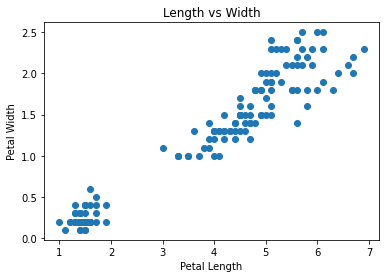

In [3]:
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.title("Length vs Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

We can see that there exists a positive linear relationship betweem the length and width of the petals. Let us visualise with the help of a heatmap.

We observe that there exists a high positive correlation with regards to petal length and width from the heatmap. We can now proceed to build the model.

In [6]:
regress = linear_model.LinearRegression()

train_x = np.asanyarray(iris[['petal_length']])
train_y = np.asanyarray(iris[['petal_width']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[0.41575542]]
Intercept:  [-0.36307552]


Hence, we got the coefficient and the intercept; let us plot the outputs and attempt to visualise them.

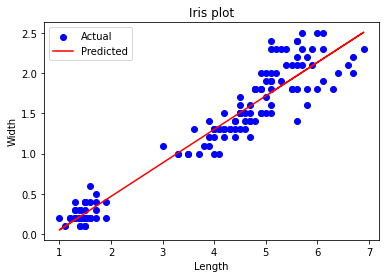

In [5]:
plt.scatter(iris.petal_length, iris.petal_width, color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Iris plot")
plt.legend()
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

We have seen the predicted vs actual values. Let us predict some of the values using the model we built.

In [7]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
iris['Predicted'] = y_predicted
print(y_predicted)
print(iris.head())

[0.2] [0.21898206]
[0.2] [0.21898206]
[0.2] [0.17740652]
[0.2] [0.2605576]
[0.2] [0.21898206]
[0.4] [0.34370869]
[0.3] [0.21898206]
[0.2] [0.2605576]
[0.2] [0.21898206]
[0.1] [0.2605576]
[0.2] [0.2605576]
[0.2] [0.30213314]
[0.1] [0.21898206]
[0.1] [0.09425544]
[0.2] [0.13583098]
[0.4] [0.2605576]
[0.4] [0.17740652]
[0.3] [0.21898206]
[0.3] [0.34370869]
[0.3] [0.2605576]
[0.2] [0.34370869]
[0.4] [0.2605576]
[0.2] [0.0526799]
[0.5] [0.34370869]
[0.2] [0.42685977]
[0.2] [0.30213314]
[0.4] [0.30213314]
[0.2] [0.2605576]
[0.2] [0.21898206]
[0.2] [0.30213314]
[0.2] [0.30213314]
[0.4] [0.2605576]
[0.1] [0.2605576]
[0.2] [0.21898206]
[0.2] [0.2605576]
[0.2] [0.13583098]
[0.2] [0.17740652]
[0.1] [0.21898206]
[0.2] [0.17740652]
[0.2] [0.2605576]
[0.3] [0.17740652]
[0.3] [0.17740652]
[0.2] [0.17740652]
[0.6] [0.30213314]
[0.4] [0.42685977]
[0.3] [0.21898206]
[0.2] [0.30213314]
[0.2] [0.21898206]
[0.2] [0.2605576]
[0.2] [0.21898206]
[1.4] [1.59097494]
[1.5] [1.50782385]
[1.5] [1.67412602]
[1.3] [

To evaluate the performance metrics, we use Mean Absolute Error, Mean Squared Error and Root Mean Square Error, along with the R<sup>2</sup> score. Let us see how


In [8]:
test_x = np.asanyarray(iris[['petal_length']])
test_y = np.asanyarray(iris[['petal_width']])
test_y_predicted = regress.predict(test_x)

print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))
print("R2-score : %2f (RMSE)",r2_score(test_y,test_y_predicted))

Mean Absolute Error: 0.15647051371014092
Mean Squared Error: 0.04206730919499318
Root Mean Squared Error: 0.20510316719883478
R2-score : %2f (RMSE) 0.9271098389904927


We got the MAE, MSE, RMSE and R2 scores. Let us learn a bit more about using training and testing data, and how to split them for a dataset.

In [10]:


train_x, test_x, train_y, test_y = train_test_split(iris[['petal_length']], iris[['petal_width']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

     petal_length
81            3.7
133           5.1
137           5.5
75            4.4
109           6.1
..            ...
71            4.0
106           4.5
14            1.2
92            4.0
102           5.9

[105 rows x 1 columns]
Testing
     petal_length
73            4.7
18            1.7
118           6.9
78            4.5
76            4.8
31            1.5
64            3.6
141           5.1
68            4.5
82            3.9
110           5.1
12            1.4
36            1.3
9             1.5
19            1.5
56            4.7
104           5.8
69            3.9
55            4.5
132           5.6
29            1.6
127           4.9
26            1.6
128           5.6
131           6.4
145           5.2
108           5.8
143           5.9
45            1.4
30            1.6
22            1.0
15            1.5
65            4.4
11            1.6
42            1.3
146           5.0
51            4.5
27            1.5
4             1.4
32            1.5
142           

In [11]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

     petal_length
73            4.7
18            1.7
118           6.9
78            4.5
76            4.8
31            1.5
64            3.6
141           5.1
68            4.5
82            3.9
110           5.1
12            1.4
36            1.3
9             1.5
19            1.5
56            4.7
104           5.8
69            3.9
55            4.5
132           5.6
29            1.6
127           4.9
26            1.6
128           5.6
131           6.4
145           5.2
108           5.8
143           5.9
45            1.4
30            1.6
22            1.0
15            1.5
65            4.4
11            1.6
42            1.3
146           5.0
51            4.5
27            1.5
4             1.4
32            1.5
142           5.1
85            4.5
86            4.7
16            1.3
10            1.5
     petal_width
73           1.2
18           0.3
118          2.3
78           1.5
76           1.4
31           0.4
64           1.3
141          2.3
68           1.5
82

In [12]:
test_x = np.asanyarray(iris[['petal_length']])
test_y = np.asanyarray(iris[['petal_width']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 0.15587559627122385
Mean square error (MSE):  0.04213187163494105
R2-score: %.2f (RMSE): 0.926997971444576


C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
accuracy = cross_val_score(regress, iris[['petal_length']], iris[['petal_width']], cv = 5,scoring='r2').mean()
print(accuracy)

0.2892374016312


In [14]:
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

We have seen how to load a dataset, visualise it, fit it to a LR model and extract the coefficients. We also learnt about various metric scores, and how to compute accuracy score. Let us now do the same for the height and weight dataset, to understand and analyse how the LR model performs for other datasets.

In [15]:
df=pd.read_pickle('AgesAndHeights.pkl')
df

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

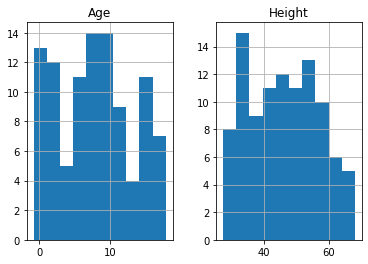

In [16]:
df.hist()

In [20]:
#data cleaning
clean_df=df[df['Age']>0]
clean_df

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


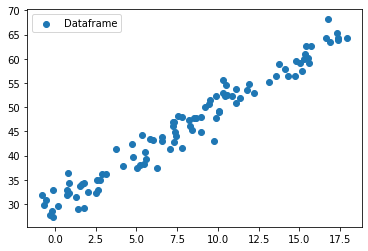

In [17]:
plt.scatter(df['Age'],df['Height'],label="Dataframe")
plt.legend()
plt.xlabel="Age"
plt.ylabel="Height"

In [18]:
regress = linear_model.LinearRegression()

train_x = np.asanyarray(df[['Age']])
train_y = np.asanyarray(df[['Height']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.9855967]]
Intercept:  [30.13813668]


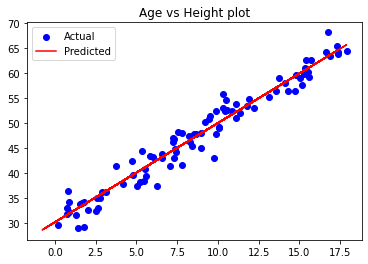

In [21]:
plt.scatter(clean_df.Age, clean_df.Height, color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Age vs Height plot")
plt.legend()
plt.show()

In [22]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Predicted'] = y_predicted
print(y_predicted)
print(df.head())

[59.62748426] [59.46117827]
[36.14645274] [36.30871868]
[46.91287846] [44.56730316]
[29.12565975] [33.74235148]
[68.1704139] [63.40434263]
[44.34636503] [40.763587]
[47.71361295] [47.32489563]
[37.82994409] [38.48954239]
[44.79306512] [44.7455582]
[34.05901466] [33.4504658]
[46.14234545] [46.61255074]
[56.45678228] [59.42466513]
[59.87003819] [60.48888008]
[28.6478337] [29.81342871]
[64.23638736] [63.2089288]
[34.24599643] [31.84413733]
[45.29759191] [46.88332892]
[54.75189183] [53.81411704]
[32.93518571] [31.66363732]
[51.99837] [52.6985312]
[29.88392844] [28.78194046]
[31.52350033] [32.71142883]
[55.70481247] [50.61373091]
[63.86109721] [64.67432052]
[52.9199051] [50.60969938]
[32.83092177] [29.84746185]
[37.36102444] [42.52358567]
[60.23327195] [61.01720583]
[35.01026126] [35.64511816]
[59.12701931] [61.10945346]
[31.96080741] [28.58767779]
[48.21846885] [45.18478567]
[32.56232215] [34.19204419]
[47.75274969] [49.80875267]
[36.24179872] [35.84181315]
[33.78175852] [33.20056092]
[27.

In [23]:
test_x = np.asanyarray(df[['Age']])
test_y = np.asanyarray(df[['Height']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 1.7027013202326964
Mean square error (MSE):  4.666220081235937
R2-score: %.2f (RMSE): 0.9594955233989455


In [24]:
train_x, test_x, train_y, test_y = train_test_split(df[['Age']], df[['Height']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

          Age
11  14.749485
47   7.309796
85   5.859181
28   2.773464
93  11.090121
..        ...
60  17.327126
71   2.583558
14  16.655342
92  14.128957
51  15.401447

[70 rows x 1 columns]
Testing
          Age
83   7.789872
53   8.985154
70   8.537380
45   0.195686
44   5.202815
39   5.993726
22  10.312061
80   7.273686
10   8.296959
0   14.767874
18   0.768283
30  -0.780853
73  10.406422
33   9.906652
90  14.274300
4   16.753758
76   9.514770
77  10.081866
12  15.285452
31   7.577898
55   0.751925
88  15.338874
26   6.237646
42   5.020210
69  11.771255
15   0.859188
40   4.805291
96   5.591509
9    1.668178
72   1.438003
Coefficients:  [[1.96867735]]
Intercept:  [30.16681336]


In [25]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

          Age
83   7.789872
53   8.985154
70   8.537380
45   0.195686
44   5.202815
39   5.993726
22  10.312061
80   7.273686
10   8.296959
0   14.767874
18   0.768283
30  -0.780853
73  10.406422
33   9.906652
90  14.274300
4   16.753758
76   9.514770
77  10.081866
12  15.285452
31   7.577898
55   0.751925
88  15.338874
26   6.237646
42   5.020210
69  11.771255
15   0.859188
40   4.805291
96   5.591509
9    1.668178
72   1.438003
       Height
83  47.994929
53  48.011599
70  47.803625
45  29.508468
44  38.099289
39  43.287003
22  55.704812
80  46.214156
10  46.142345
0   59.627484
18  32.935186
30  31.960807
73  52.336935
33  47.752750
90  56.364458
4   68.170414
76  51.445397
77  48.994094
12  59.870038
31  48.218469
55  31.827347
88  60.989253
26  37.361024
42  37.439030
69  53.453691
15  34.245996
40  39.665424
96  39.339990
9   34.059015
72  29.007696
[[45.50255725]
 [47.85568213]
 [46.97416051]
 [30.55205514]
 [40.40947754]
 [41.96652592]
 [50.46793418]
 [44.48635411]
 [46.5008482

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

accuracy = cross_val_score(regress, df[['Age']], df[['Height']], cv = 5,scoring='r2').mean()
print(accuracy)

Mean Absolute Error: 1.8512967592019673
Mean Squared Error: 5.65912521849093
Root Mean Squared Error: 2.378891594522737
0.9546509442400872


In [27]:
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### While comparing the performance of linear modelling for both datasets, we conclude that the Ages and Heights dataset has a higher R2 score (0.95) compared to the iris dataset (0.92). Moreover, the mean value of cross-fold validation accuracy is very high for Ages and Heights dataset (0.95), compared to iris dataset (0.28)Therefore, LR performs better for the Ages and Weights dataset.